In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix

In [2]:
!curl -LJO https://raw.githubusercontent.com/zhangky12/TSP_RL_Q/master/wi29.tsp.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   944  100   944    0     0   4431      0 --:--:-- --:--:-- --:--:--  4431


In [82]:
f = open("wi29.tsp.txt", "r")
number = 25

cities_loc = []
count = 0
for x in f:
  if count == number:
    break
  if x[0].isnumeric():
    count += 1
    location = x.split(' ')
    cities_loc.append([float(location[1]), float(location[2])])

In [83]:
CG_matrix = distance_matrix(cities_loc, cities_loc)

In [84]:
def TSP_heuristic(matrix, start_index):
  path = [start_index]
  node_set = set()
  node_set.add(start_index)
  N = len(matrix)
  min_index = start_index

  for i in range(N-1):
    min_dist = float('inf')
    for j in range(N):
      # find nearset neighbor among unvisited vertex by linear search
      if j not in node_set and min_index != j:
        if matrix[min_index][j] < min_dist:
          min_dist = matrix[min_index][j]
          next_index = j
    assert min_dist != float('inf')
    min_index = next_index
    node_set.add(min_index)

    path.append(min_index)

  path.append(start_index)
  #print(path)
  return path

In [85]:
def path_check(path):
  vertex_set = set()
  for v in path:
    if v in vertex_set and v!=0:
      return False 
    vertex_set.add(v)
  
  return True

In [73]:
def path_length(path):
  length = 0
  for i in range(len(path)-1):
    length += CG_matrix[path[i]][path[i+1]]

  return length

In [86]:
length = np.inf
for i in range(len(CG_matrix)):
  cur_path = TSP_heuristic(CG_matrix, i)
  cur_len = path_length(cur_path)
  if cur_len < length:
    length = cur_len
    path = cur_path

In [87]:
path, length

([12,
  11,
  7,
  3,
  4,
  5,
  1,
  0,
  9,
  10,
  14,
  18,
  17,
  21,
  22,
  20,
  16,
  19,
  15,
  24,
  23,
  13,
  8,
  6,
  2,
  12],
 30314.04482466036)

In [9]:
path = TSP_heuristic(CG_matrix, 0)

In [10]:
path_length(path)

36388.05923226534

In [ ]:
# Total lenght
better_app_length = 0
for i in range(len(path)-1):
  better_app_length += CG_matrix[path[i]][path[i+1]]

better_app_length 

36388.05923226534

In [ ]:
path_check(path)

True

In [ ]:
arranged_cities = []
for i in path:
  arranged_cities.append(cities_loc[i])
arranged_cities.append(cities_loc[0])

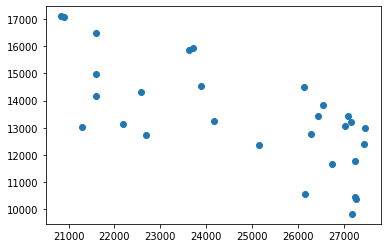

In [ ]:
plt.scatter([i[0] for i in cities_loc], [i[1] for i in cities_loc])

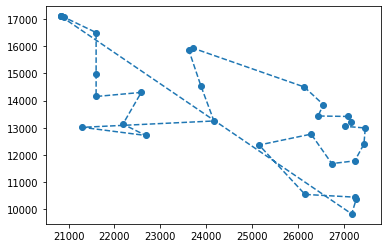

In [ ]:
plt.plot([i[0] for i in arranged_cities], [i[1] for i in arranged_cities], 
         'o',
         linestyle='dashed')